# AzureML Serving

After using the [**azureml_utils function**](https://mlrun.org/marketplace/functions/master/azureml_utils/) from the MLRun's function marketplace and you have a model(s) in your hand, it is time for serving!

In [1]:
import mlrun

> 2022-06-08 08:18:28,666 [info] Server and client versions are not the same: {'parsed_server_version': VersionInfo(major=1, minor=1, patch=0, prerelease='rc3', build=None), 'parsed_client_version': VersionInfo(major=1, minor=0, patch=2, prerelease=None, build=None)}



## Import the Function from the Marketplace

So for using the AzureML model server function, you will need first to import the function:

In [2]:
# serving_fn = mlrun.import_function('hub://azureml_serving')
serving_fn = mlrun.import_function('function.yaml')

## Setting Topology and Adding the Trained Models

In the [**azureml-demo**](https://github.com/mlrun/demos/blob/1.0.x/azureml-demo/azureml_demo.ipynb) it is explained in details how to get the trained model after using the `azureml_utils` function. So for this example we will use a model that we trained on AzureML:

In [3]:
model_path = mlrun.get_sample_path('models/function-marketplace-models/azureml_serving/model_1.pkl')
iris_path = mlrun.get_sample_path('data/iris/iris_dataset.csv')

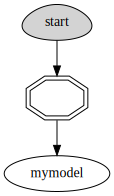

In [4]:
serving_fn.add_model('mymodel', model_path=model_path)

# Plot the ensemble configuration
serving_fn.spec.graph.plot()

## Test the Server Locally

In [5]:
sample = mlrun.get_dataitem(iris_path).as_df().sample(5).drop('label', axis=1).values.tolist()
sample

[[5.4, 3.9, 1.7, 0.4],
 [6.0, 3.0, 4.8, 1.8],
 [5.0, 3.5, 1.3, 0.3],
 [5.6, 2.8, 4.9, 2.0],
 [6.5, 3.0, 5.8, 2.2]]

In [6]:
# Create a mock server from the serving function and test it (require azureml-automl-runtime~=1.38.1 to be installed locally)

# local_server = serving_fn.to_mock_server()
# local_server.test(f'/v2/models/infer', {"inputs": sample})

## Deploying the Serving Function

In [7]:
serving_fn.deploy()

> 2022-06-08 08:18:43,039 [info] Starting remote function deploy
2022-06-08 08:18:43  (info) Deploying function
2022-06-08 08:18:43  (info) Building
2022-06-08 08:18:43  (info) Staging files and preparing base images
2022-06-08 08:18:43  (info) Building processor image
2022-06-08 08:19:48  (info) Build complete
2022-06-08 08:20:02  (info) Function deploy complete
> 2022-06-08 08:20:03,334 [info] successfully deployed function: {'internal_invocation_urls': ['nuclio-default-azureml-serving.default-tenant.svc.cluster.local:8080'], 'external_invocation_urls': ['default-azureml-serving-default.default-tenant.app.yh43.iguazio-cd1.com/']}


'http://default-azureml-serving-default.default-tenant.app.yh43.iguazio-cd1.com/'

## Using the Live Model-Serving Function

In [9]:
serving_fn.invoke(f'/v2/models/mymodel/infer', {"inputs": sample})

> 2022-06-08 08:25:54,202 [info] invoking function: {'method': 'POST', 'path': 'http://nuclio-default-azureml-serving.default-tenant.svc.cluster.local:8080/v2/models/mymodel/infer'}


{'id': 'e7e5c580-1d61-4b8e-9c95-32b57d1f3d42',
 'model_name': 'mymodel',
 'outputs': [0, 2, 0, 2, 2]}